# 1. Data Integration:

In [1]:
#Data Integration - Import the data, and some features to work the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


test = pd.read_csv('test.csv', delimiter = ';')
train = pd.read_csv('train.csv', delimiter = ';')
validation = pd.read_csv('validation.csv', delimiter = ';')

#Eliminate visualization warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Data Exploration of train Dataset:
-here it's important to describe what we can see by a first look, outliers, missing values, behaviors,...

In [2]:
train.head()

Cust_ID    Churn                    Name Longevity  Year_Birth TypeTravel  \
0        1    churn       Ms. Nicole Clarke       yes      1974.0   business   
1        2  nochurn         Mr. Jesse Scott       yes      1965.0   business   
2        3    churn  Mr. Christopher Carter       yes      1973.0   business   
3        4  nochurn     Ms. Jennifer Morgan       yes      1993.0    leisure   
4        5  nochurn       Mr. Michael White       yes      1989.0   business   

  RoomType  RewardPoints  Comfort  ReceptionSchedule  ...  Wifi  Amenities  \
0   single          4907        3                  4  ...     4          3   
1   single          6724        1                  1  ...     5          3   
2   single          4365        3                  3  ...     1          4   
3   double          3849        1                  1  ...     4          4   
4   single          5376        2                  2  ...     5          5   

   Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  \
0      4              3             3          3         3        4   
1      4              5             5          5         5        1   
2      4              3             3          2         3        2   
3      5              4             4          4         4        4   
4      5              5             5          3         4        1   

   Cleanliness  BarService  
0            3           4  
1            5           2  
2            3           1  
3            4           3  
4            3           5  

[5 rows x 22 columns]

In [3]:
train.shape

(15589, 22)

In [4]:
#We need to have an idea of how the data is
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15589 non-null  int64  
 1   Churn              15589 non-null  object 
 2   Name               15589 non-null  object 
 3   Longevity          15589 non-null  object 
 4   Year_Birth         15394 non-null  float64
 5   TypeTravel         15589 non-null  object 
 6   RoomType           15589 non-null  object 
 7   RewardPoints       15589 non-null  int64  
 8   Comfort            15589 non-null  int64  
 9   ReceptionSchedule  15589 non-null  int64  
 10  FoodDrink          15589 non-null  int64  
 11  Location           15589 non-null  int64  
 12  Wifi               15589 non-null  int64  
 13  Amenities          15589 non-null  int64  
 14  Staff              15589 non-null  int64  
 15  OnlineBooking      15589 non-null  int64  
 16  PriceQuality       155

In [5]:
#% of Missing values in the data
train.isna().sum()/len(train)*100

Cust_ID              0.000000
Churn                0.000000
Name                 0.000000
Longevity            0.000000
Year_Birth           1.250882
TypeTravel           0.000000
RoomType             0.000000
RewardPoints         0.000000
Comfort              0.000000
ReceptionSchedule    0.000000
FoodDrink            0.000000
Location             0.000000
Wifi                 0.000000
Amenities            0.000000
Staff                0.000000
OnlineBooking        0.000000
PriceQuality         0.000000
RoomSpace            0.000000
CheckOut             0.000000
Checkin              0.000000
Cleanliness          0.000000
BarService           0.000000
dtype: float64

Text(0.5, 0, 'Longevity')

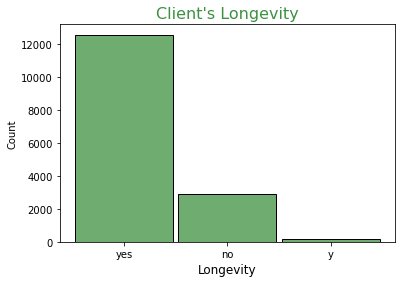

In [6]:
#Longevity Histogram
sns.histplot(data=train, x='Longevity', shrink=0.95, color='#3D9140' )
plt.title("Client's Longevity", size=16, color='#3D9140')
plt.xlabel('Longevity',size=12)

Text(0.5, 0, 'Year')

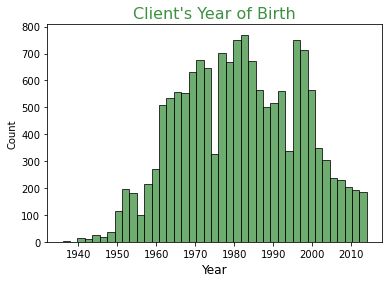

In [7]:
#Year of Birth Histogram
sns.histplot(data=train, x='Year_Birth', color='#3D9140')
plt.title("Client's Year of Birth", size=16, color='#3D9140')
plt.xlabel('Year',size=12)

Text(0.5, 0, ' ')

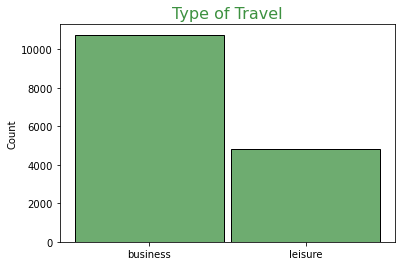

In [8]:
#Travel Type Histogram - to see how many we have, and each contribution
sns.histplot(data=train, x='TypeTravel', shrink=0.95, color='#3D9140')
plt.title("Type of Travel", size=16, color='#3D9140')
plt.xlabel(' ',size=1)

Text(0.5, 0, ' ')

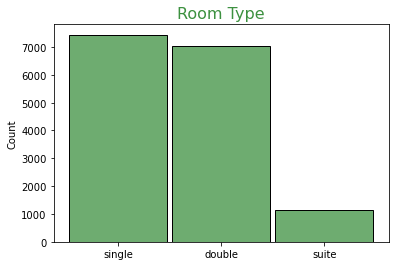

In [9]:
#Room Type Histogram - to see how many we have, and each contribution
sns.histplot(data=train, x='RoomType', shrink=0.95, color='#3D9140')
plt.title("Room Type", size=16, color='#3D9140')
plt.xlabel(' ',size=1)

Text(0.5, 0, ' ')

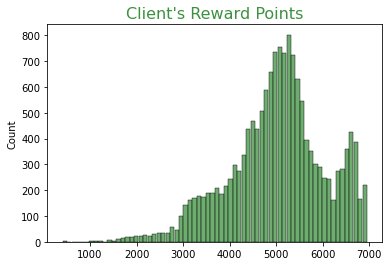

In [10]:
#Room Type Histogram - to see how many we have, and each contribution
sns.histplot(data=train, x='RewardPoints', shrink=0.95, color='#3D9140')
plt.title("Client's Reward Points", size=16, color='#3D9140')
plt.xlabel(' ',size=1)

First quartile is 4445.0
Third quartile is 5649.0
Maximum is 6950
Minimum is 409


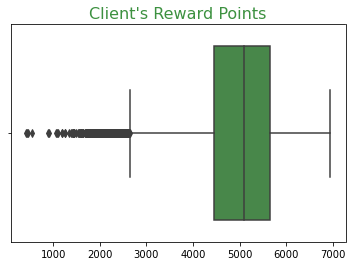

In [11]:
#Box-plot of Rewards Points - to have idea of the outliers
sns.boxplot(x='RewardPoints', data = train, color='#3D9140')
plt.title("Client's Reward Points", size=16, color='#3D9140')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train['RewardPoints'], [75 ,25])
print('First quartile is '+ str(q1))
print('Third quartile is '+ str(q3))
print('Maximum is '+str(max(train['RewardPoints'])))
print('Minimum is '+str(min(train['RewardPoints'])))

(0.0, 2550.0)

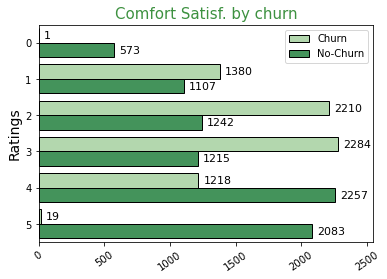

In [12]:
#Bar plot of Comfort Satisfaction Level
ax1=sns.countplot(y = 'Comfort', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Comfort Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax1.bar_label(ax1.containers[0], size=11, padding=5) 
ax1.bar_label(ax1.containers[1], size=11, padding=5)
ax1.set_xlim(right=2550)

(0.0, 2150.0)

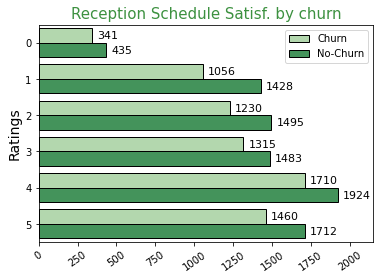

In [13]:
#Bar plot of Reception Schedule Satisfaction Level
ax2=sns.countplot(y = 'ReceptionSchedule', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Reception Schedule Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax2.bar_label(ax2.containers[0], size=11, padding=5) 
ax2.bar_label(ax2.containers[1], size=11, padding=5)
ax2.set_xlim(right=2150)

(0.0, 2200.0)

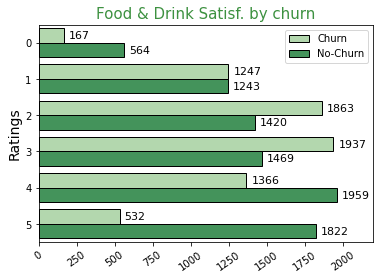

In [14]:
#Bar plot of Food & Drinks Satisfaction Level
ax3=sns.countplot(y = 'FoodDrink', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Food & Drink Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax3.bar_label(ax3.containers[0], size=11, padding=5) 
ax3.bar_label(ax3.containers[1], size=11, padding=5)
ax3.set_xlim(right=2200)

(0.0, 2500.0)

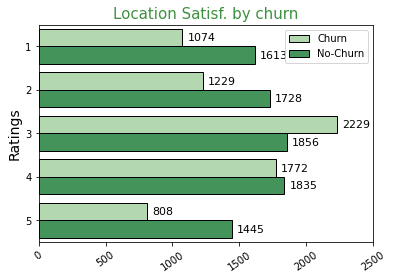

In [15]:
#Bar plot of Location Satisfaction Level
ax4=sns.countplot(y = 'Location', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Location Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax4.bar_label(ax4.containers[0], size=11, padding=5) 
ax4.bar_label(ax4.containers[1], size=11, padding=5)
ax4.set_xlim(right=2500)

(0.0, 2650.0)

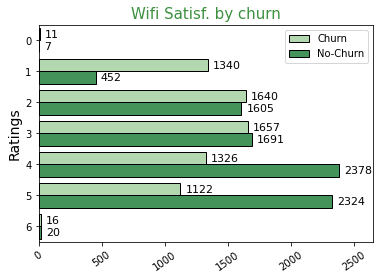

In [16]:
#Bar plot of Wifi Satisfaction Level
ax5=sns.countplot(y = 'Wifi', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Wifi Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax5.bar_label(ax5.containers[0], size=11, padding=5) 
ax5.bar_label(ax5.containers[1], size=11, padding=5)
ax5.set_xlim(right=2650)

#Notice that we have a rating of 6 here! Doesn't make sense

(0.0, 3920.0)

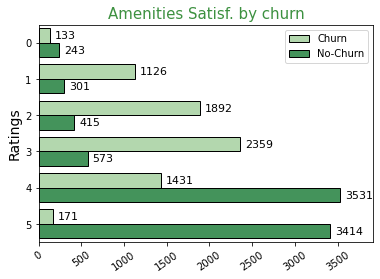

In [17]:
#Bar plot of Amenities(pool, gym, daycare,...) Satisfaction Level
ax6=sns.countplot(y = 'Amenities', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Amenities Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax6.bar_label(ax6.containers[0], size=11, padding=5) 
ax6.bar_label(ax6.containers[1], size=11, padding=5)
ax6.set_xlim(right=3920)

(0.0, 3750.0)

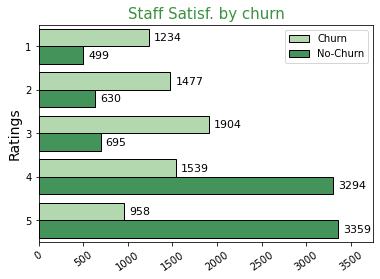

In [18]:
#Bar plot of Staff Satisfaction Level
ax7=sns.countplot(y = 'Staff', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Staff Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax7.bar_label(ax7.containers[0], size=11, padding=5) 
ax7.bar_label(ax7.containers[1], size=11, padding=5)
ax7.set_xlim(right=3750)

(0.0, 3750.0)

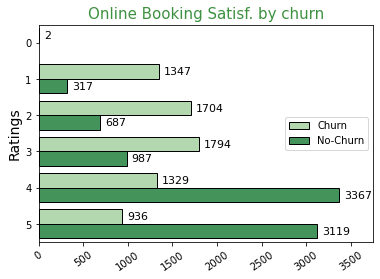

In [19]:
#Bar plot of Online Booking Satisfaction Level
ax8=sns.countplot(y = 'OnlineBooking', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Online Booking Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax8.bar_label(ax8.containers[0], size=11, padding=5) 
ax8.bar_label(ax8.containers[1], size=11, padding=5)
ax8.set_xlim(right=3750)

(0.0, 3500.0)

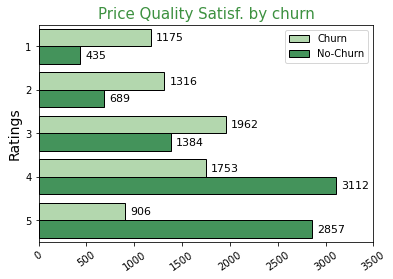

In [20]:
#Bar plot of Price Quality Satisfaction Level
ax9=sns.countplot(y = 'PriceQuality', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Price Quality Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax9.bar_label(ax9.containers[0], size=11, padding=5) 
ax9.bar_label(ax9.containers[1], size=11, padding=5)
ax9.set_xlim(right=3500)

(0.0, 3550.0)

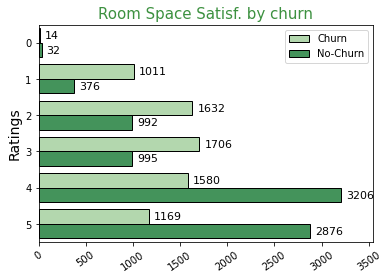

In [21]:
#Bar plot of Room Space Satisfaction Level
ax10=sns.countplot(y = 'RoomSpace', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Room Space Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax10.bar_label(ax10.containers[0], size=11, padding=5) 
ax10.bar_label(ax10.containers[1], size=11, padding=5)
ax10.set_xlim(right=3550)

(0.0, 3700.0)

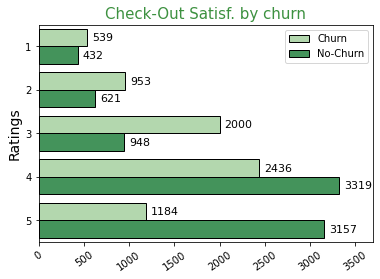

In [22]:
#Bar plot of Check Out Satisfaction Level
ax11=sns.countplot(y = 'CheckOut', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Check-Out Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax11.bar_label(ax11.containers[0], size=11, padding=5) 
ax11.bar_label(ax11.containers[1], size=11, padding=5)
ax11.set_xlim(right=3700)

(0.0, 2800.0)

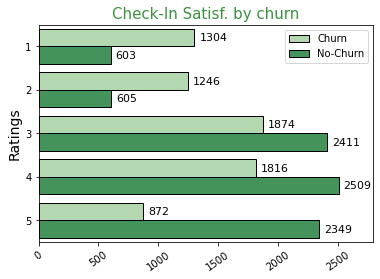

In [23]:
#Bar plot of Check In Satisfaction Level
ax12=sns.countplot(y = 'Checkin', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Check-In Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax12.bar_label(ax12.containers[0], size=11, padding=5) 
ax12.bar_label(ax12.containers[1], size=11, padding=5)
ax12.set_xlim(right=2800)

(0.0, 3780.0)

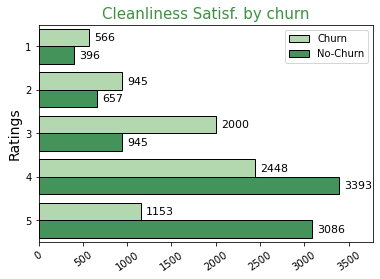

In [24]:
#Bar plot of Cleanliness Satisfaction Level
ax13=sns.countplot(y = 'Cleanliness', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Cleanliness Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax13.bar_label(ax13.containers[0], size=11, padding=5) 
ax13.bar_label(ax13.containers[1], size=11, padding=5)
ax13.set_xlim(right=3780)

(0.0, 3100.0)

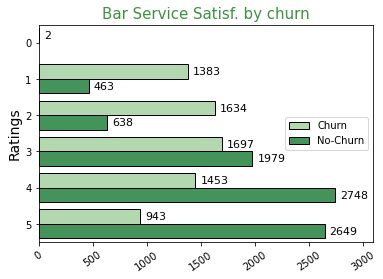

In [25]:
#Bar plot of Bar Service Satisfaction Level
ax14=sns.countplot(y = 'BarService', hue = 'Churn', data = train, edgecolor='black', palette="Greens")
plt.title("Bar Service Satisf. by churn", color='#3D9140', size=15 )
plt.legend(['Churn','No-Churn'])
plt.xlabel('', loc='center')
plt.ylabel('Ratings', loc='center', size=14)
plt.xticks(rotation=35)
ax14.bar_label(ax14.containers[0], size=11, padding=5) 
ax14.bar_label(ax14.containers[1], size=11, padding=5)
ax14.set_xlim(right=3100)

# 3. Preprocessing of train
Treat:
    - Outliers
    - Missing Values
    - Categorical Data (to Numerical one, with dummy variable)
    - Coherence Checking
    - Correlations 
    - Scaling

In [26]:
#We will create a copy of the dataset b4 starting to work on it. And we will work on the copy
train_c = train.copy()
train_c


Cust_ID    Churn                    Name Longevity  Year_Birth  \
0            1    churn       Ms. Nicole Clarke       yes      1974.0   
1            2  nochurn         Mr. Jesse Scott       yes      1965.0   
2            3    churn  Mr. Christopher Carter       yes      1973.0   
3            4  nochurn     Ms. Jennifer Morgan       yes      1993.0   
4            5  nochurn       Mr. Michael White       yes      1989.0   
...        ...      ...                     ...       ...         ...   
15584    15585    churn       Ms. Wendy Roberts        no      1988.0   
15585    15586    churn         Ms. Sonya Smith        no      2000.0   
15586    15587  nochurn      Mr. Maxwell Wright       yes      1964.0   
15587    15588  nochurn       Mr. Gregory Moran       yes      1992.0   
15588    15589    churn       Mr. Steven Mendez       yes      1983.0   

      TypeTravel RoomType  RewardPoints  Comfort  ReceptionSchedule  ...  \
0       business   single          4907        3                  4  ...   
1       business   single          6724        1                  1  ...   
2       business   single          4365        3                  3  ...   
3        leisure   double          3849        1                  1  ...   
4       business   single          5376        2                  2  ...   
...          ...      ...           ...      ...                ...  ...   
15584   business   double          4968        2                  0  ...   
15585   business   double          4970        3                  3  ...   
15586   business   single          4046        1                  1  ...   
15587    leisure   double          5155        4                  3  ...   
15588   business    suite          5136        3                  3  ...   

       Wifi  Amenities  Staff  OnlineBooking  PriceQuality  RoomSpace  \
0         4          3      4              3             3          3   
1         5          3      4              5             5          5   
2         1          4      4              3             3          2   
3         4          4      5              4             4          4   
4         5          5      5              5             5          3   
...     ...        ...    ...            ...           ...        ...   
15584     3          2      4              3             4          5   
15585     5          3      5              5             3          1   
15586     3          4      5              4             4          4   
15587     5          4      5              5             2          5   
15588     3          3      3              3             4          5   

       CheckOut  Checkin  Cleanliness  BarService  
0             3        4            3           4  
1             5        1            5           2  
2             3        2            3           1  
3             4        4            4           3  
4             4        1            3           5  
...         ...      ...          ...         ...  
15584         1        3            4           3  
15585         3        4            4           5  
15586         4        5            4           4  
15587         4        3            4           5  
15588         4        1            3           3  

[15589 rows x 22 columns]

In [27]:
#Transform CustID as index
train_c.set_index("Cust_ID", inplace=True)
train_c

Churn                    Name Longevity  Year_Birth TypeTravel  \
Cust_ID                                                                     
1          churn       Ms. Nicole Clarke       yes      1974.0   business   
2        nochurn         Mr. Jesse Scott       yes      1965.0   business   
3          churn  Mr. Christopher Carter       yes      1973.0   business   
4        nochurn     Ms. Jennifer Morgan       yes      1993.0    leisure   
5        nochurn       Mr. Michael White       yes      1989.0   business   
...          ...                     ...       ...         ...        ...   
15585      churn       Ms. Wendy Roberts        no      1988.0   business   
15586      churn         Ms. Sonya Smith        no      2000.0   business   
15587    nochurn      Mr. Maxwell Wright       yes      1964.0   business   
15588    nochurn       Mr. Gregory Moran       yes      1992.0    leisure   
15589      churn       Mr. Steven Mendez       yes      1983.0   business   

        RoomType  RewardPoints  Comfort  ReceptionSchedule  FoodDrink  ...  \
Cust_ID                                                                ...   
1         single          4907        3                  4          1  ...   
2         single          6724        1                  1          1  ...   
3         single          4365        3                  3          3  ...   
4         double          3849        1                  1          1  ...   
5         single          5376        2                  2          3  ...   
...          ...           ...      ...                ...        ...  ...   
15585     double          4968        2                  0          2  ...   
15586     double          4970        3                  3          3  ...   
15587     single          4046        1                  1          1  ...   
15588     double          5155        4                  3          4  ...   
15589      suite          5136        3                  3          3  ...   

         Wifi  Amenities  Staff  OnlineBooking  PriceQuality  RoomSpace  \
Cust_ID                                                                   
1           4          3      4              3             3          3   
2           5          3      4              5             5          5   
3           1          4      4              3             3          2   
4           4          4      5              4             4          4   
5           5          5      5              5             5          3   
...       ...        ...    ...            ...           ...        ...   
15585       3          2      4              3             4          5   
15586       5          3      5              5             3          1   
15587       3          4      5              4             4          4   
15588       5          4      5              5             2          5   
15589       3          3      3              3             4          5   

         CheckOut  Checkin  Cleanliness  BarService  
Cust_ID                                              
1               3        4            3           4  
2               5        1            5           2  
3               3        2            3           1  
4               4        4            4           3  
5               4        1            3           5  
...           ...      ...          ...         ...  
15585           1        3            4           3  
15586           3        4            4           5  
15587           4        5            4           4  
15588           4        3            4           5  
15589           4        1            3           3  

[15589 rows x 21 columns]

# 3.1. Treating Missing Values

In [28]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [29]:
#We see that there is mmissing values, so isolate Year_Birth
YearBirth = train_c[['Year_Birth']].copy()

scaler_t = MinMaxScaler()
YearBirth = pd.DataFrame(scaler_t.fit_transform(YearBirth), columns = YearBirth.columns, index=train_c.index)

imputer_ms = KNNImputer(n_neighbors=5)
YearBirth = pd.DataFrame(imputer_ms.fit_transform(YearBirth),columns = YearBirth.columns, index=train_c.index)

#If we check there is no more missing values

#We now undo the transformation to get the real values, to later transform in age:
YearBirth = pd.DataFrame(scaler_t.inverse_transform(YearBirth),columns = YearBirth.columns)
YearBirth.index = train_c.index

#Delete old Year_Birth and Join this new Year_Birth to train_c
train_c.drop('Year_Birth', inplace=True, axis=1)

train_c = pd.concat([train_c, YearBirth], axis=1) 
train_c.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   TypeTravel         15589 non-null  object 
 4   RoomType           15589 non-null  object 
 5   RewardPoints       15589 non-null  int64  
 6   Comfort            15589 non-null  int64  
 7   ReceptionSchedule  15589 non-null  int64  
 8   FoodDrink          15589 non-null  int64  
 9   Location           15589 non-null  int64  
 10  Wifi               15589 non-null  int64  
 11  Amenities          15589 non-null  int64  
 12  Staff              15589 non-null  int64  
 13  OnlineBooking      15589 non-null  int64  
 14  PriceQuality       15589 non-null  int64  
 15  RoomSpace          15589 non-null  int64  
 16  CheckOut           155

# 3.2. Creating a New Variable

Churn Longevity TypeTravel RoomType  RewardPoints  Comfort  \
Cust_ID                                                                 
1          churn       yes   business   single          4907        3   
2        nochurn       yes   business   single          6724        1   
3          churn       yes   business   single          4365        3   
4        nochurn       yes    leisure   double          3849        1   
5        nochurn       yes   business   single          5376        2   
...          ...       ...        ...      ...           ...      ...   
15585      churn        no   business   double          4968        2   
15586      churn        no   business   double          4970        3   
15587    nochurn       yes   business   single          4046        1   
15588    nochurn       yes    leisure   double          5155        4   
15589      churn       yes   business    suite          5136        3   

         ReceptionSchedule  FoodDrink  Location  Wifi  ...  Staff  \
Cust_ID                                                ...          
1                        4          1         4     4  ...      4   
2                        1          1         1     5  ...      4   
3                        3          3         3     1  ...      4   
4                        1          1         1     4  ...      5   
5                        2          3         2     5  ...      5   
...                    ...        ...       ...   ...  ...    ...   
15585                    0          2         2     3  ...      4   
15586                    3          3         3     5  ...      5   
15587                    1          1         1     3  ...      5   
15588                    3          4         4     5  ...      5   
15589                    3          3         3     3  ...      3   

         OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  \
Cust_ID                                                              
1                    3             3          3         3        4   
2                    5             5          5         5        1   
3                    3             3          2         3        2   
4                    4             4          4         4        4   
5                    5             5          3         4        1   
...                ...           ...        ...       ...      ...   
15585                3             4          5         1        3   
15586                5             3          1         3        4   
15587                4             4          4         4        5   
15588                5             2          5         4        3   
15589                3             4          5         4        1   

         Cleanliness  BarService  Year_Birth  Female  
Cust_ID                                               
1                  3           4      1974.0       1  
2                  5           2      1965.0       0  
3                  3           1      1973.0       0  
4                  4           3      1993.0       1  
5                  3           5      1989.0       0  
...              ...         ...         ...     ...  
15585              4           3      1988.0       1  
15586              4           5      2000.0       1  
15587              4           4      1964.0       0  
15588              4           5      1992.0       0  
15589              3           3      1983.0       0  

[15589 rows x 21 columns]

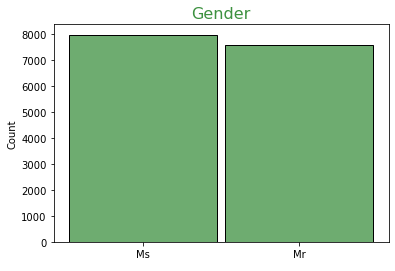

In [30]:
#From Name we can get the gender! 
train_c['Gender'] = train_c['Name'].astype(str).str[0:2]

#Seeing the types of gender we have
sns.histplot(data=train_c, x='Gender',shrink=0.95, color='#3D9140')
plt.title("Gender", size=16, color='#3D9140')
plt.xlabel(' ',size=1)

#So we transform Ms in 1 and Mr in O
train_c['Gender'].replace(['Ms', 'Mr'],[1,0], inplace = True)

#Rename it so we know
train_c.rename(columns = {'Gender': 'Female'}, inplace=True)

#Drop name
train_c.drop('Name', inplace=True, axis=1)

train_c

In [31]:
#year to age
train_c['Age'] = date.today().year - train_c['Year_Birth']

#drop year
train_c.drop('Year_Birth', inplace=True, axis=1)

#Convert Data types
train_c['Age'] = train_c['Age'].astype('int32')
train_c.head()


Churn Longevity TypeTravel RoomType  RewardPoints  Comfort  \
Cust_ID                                                                 
1          churn       yes   business   single          4907        3   
2        nochurn       yes   business   single          6724        1   
3          churn       yes   business   single          4365        3   
4        nochurn       yes    leisure   double          3849        1   
5        nochurn       yes   business   single          5376        2   

         ReceptionSchedule  FoodDrink  Location  Wifi  ...  Staff  \
Cust_ID                                                ...          
1                        4          1         4     4  ...      4   
2                        1          1         1     5  ...      4   
3                        3          3         3     1  ...      4   
4                        1          1         1     4  ...      5   
5                        2          3         2     5  ...      5   

         OnlineBooking  PriceQuality  RoomSpace  CheckOut  Checkin  \
Cust_ID                                                              
1                    3             3          3         3        4   
2                    5             5          5         5        1   
3                    3             3          2         3        2   
4                    4             4          4         4        4   
5                    5             5          3         4        1   

         Cleanliness  BarService  Female  Age  
Cust_ID                                        
1                  3           4       1   48  
2                  5           2       0   57  
3                  3           1       0   48  
4                  4           3       1   29  
5                  3           5       0   33  

[5 rows x 21 columns]

# 3.3. Coeherence Checking

In [32]:
#Coeherence of Ratings on Wifi - Transform the 6 in 5
#Why? Since there are little of it and the business says that the ratings are only until 5, we could remove the observations
#or count them as 5, we decided to keep them and count as rating 5!
train_c['Wifi'].replace(6,5, inplace = True)
train_c['Wifi'].max()

#Coherence of Longevity - same thinking y-> yes
train_c['Longevity'].replace('y', 'yes', inplace=True)

#Checking the max and min of Age
print(train_c['Age'].min())
print(train_c['Age'].max())

#Does it make sense a customer be younger than 8 years old?? Since the data ends in 2014, we have customers that have the
#year of birth at 2014, which doesn't make sense, because they would have 0 years old

7
85


# 3.4. Transforming Categorical Data

In [33]:
#Transform Churn/Longevity to 0,1 and other categorical variables*
train_c.replace(['churn', 'nochurn'], [1, 0], inplace=True)

train_c['Longevity'].replace(['yes', 'no'], [1,0], inplace=True)
train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Churn              15589 non-null  int64 
 1   Longevity          15589 non-null  int64 
 2   TypeTravel         15589 non-null  object
 3   RoomType           15589 non-null  object
 4   RewardPoints       15589 non-null  int64 
 5   Comfort            15589 non-null  int64 
 6   ReceptionSchedule  15589 non-null  int64 
 7   FoodDrink          15589 non-null  int64 
 8   Location           15589 non-null  int64 
 9   Wifi               15589 non-null  int64 
 10  Amenities          15589 non-null  int64 
 11  Staff              15589 non-null  int64 
 12  OnlineBooking      15589 non-null  int64 
 13  PriceQuality       15589 non-null  int64 
 14  RoomSpace          15589 non-null  int64 
 15  CheckOut           15589 non-null  int64 
 16  Checkin            15589 non-null  int64

In [34]:
#We create dummy variables for Type of Travel and Room Type, since they had only 2 and 3 categories, respectively
categorical_dat = train_c[['TypeTravel', 'RoomType']].copy()
dummy=pd.get_dummies(categorical_dat, drop_first=True)

#merge train_c and ours dummmy variables
train_c = pd.concat([train_c, dummy], axis=1) #saw in the internet, outter join by index
train_c.drop(['TypeTravel', 'RoomType'], inplace=True, axis=1) #we need to take the '#' when reruning!
train_c

#change the names of the new variables:
train_c.rename(columns = {'TypeTravel_leisure': 'Leisure_Travel', 'RoomType_single': 'Single_Room', 'RoomType_suite' : 'Suite'}, inplace=True)

# 3.5. Treating Outliers

Churn  Longevity  RewardPoints  Comfort  ReceptionSchedule  \
Cust_ID                                                               
48           0          1          2426        1                  1   
162          1          1          2263        2                  4   
202          1          1          2178        2                  5   
212          0          1          2370        2                  2   
243          0          1          1963        4                  4   
...        ...        ...           ...      ...                ...   
15409        1          1          1963        3                  5   
15501        0          1          2574        4                  4   
15527        0          1          2626        4                  4   
15539        0          1          1564        1                  1   
15577        0          1          1912        3                  3   

         FoodDrink  Location  Wifi  Amenities  Staff  ...  RoomSpace  \
Cust_ID                                               ...              
48               1         1     5          5      5  ...          2   
162              5         4     2          2      2  ...          2   
202              5         5     2          2      2  ...          3   
212              2         2     4          4      4  ...          3   
243              4         4     4          4      4  ...          2   
...            ...       ...   ...        ...    ...  ...        ...   
15409            5         5     3          3      3  ...          1   
15501            4         4     4          5      4  ...          4   
15527            4         4     4          4      4  ...          2   
15539            1         1     4          4      4  ...          3   
15577            3         3     5          5      5  ...          4   

         CheckOut  Checkin  Cleanliness  BarService  Female  Age  \
Cust_ID                                                            
48              4        3            4           5       1   30   
162             3        2            4           2       0   28   
202             4        2            4           2       1   39   
212             5        4            4           4       1   25   
243             2        3            1           4       1   29   
...           ...      ...          ...         ...     ...  ...   
15409           3        4            3           3       1    9   
15501           4        4            4           4       0   29   
15527           1        3            1           4       1   23   
15539           4        5            4           4       1   31   
15577           4        5            4           5       0   32   

         Leisure_Travel  Single_Room  Suite  
Cust_ID                                      
48                    0            1      0  
162                   0            1      0  
202                   0            1      0  
212                   0            1      0  
243                   0            1      0  
...                 ...          ...    ...  
15409                 0            1      0  
15501                 0            1      0  
15527                 0            1      0  
15539                 0            1      0  
15577                 0            1      0  

[291 rows x 22 columns]

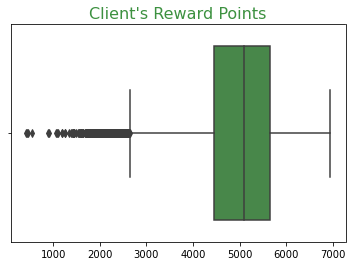

In [35]:
#Outliers
sns.boxplot(x='RewardPoints', data = train_c, color='#3D9140')
plt.title("Client's Reward Points", size=16, color='#3D9140')
plt.xlabel(' ',size=1)

#We will not remove outliers why? Too many and they can be important!
#Vizualization of how many they are:
p75, p25 = np.percentile(train_c['RewardPoints'], [75,25])
iqr = p75-p25
qmin = p25-1.5*iqr
train_c.loc[train_c['RewardPoints']<2640.5]

#we have 289 outliers (1.85%) so we cannot remove all of them using Interquartile Method!

AxesSubplot(0.125,0.125;0.775x0.755)


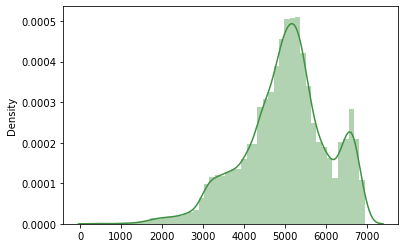

In [36]:
#Original Reward Points
print(sns.distplot(x=train['RewardPoints'],color='#3D9140'))

<AxesSubplot:ylabel='Density'>

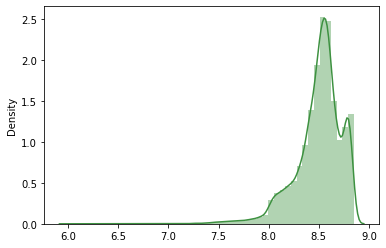

In [37]:
#RewardsPoints variablecale to log scale:
rewpoints_log = [np.log(x) for x in train_c['RewardPoints']]
sns.distplot(rewpoints_log, color='#3D9140') #not very good results!

<AxesSubplot:xlabel='RewardPoints', ylabel='Density'>

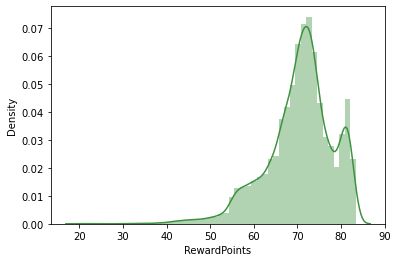

In [38]:
#RewardsPoints variable scale to Square Root Transformation:
rewpoints_sqrt = train_c['RewardPoints']**(.5)
sns.distplot(rewpoints_sqrt,color='#3D9140') #not there yet

<AxesSubplot:xlabel='RewardPoints', ylabel='Density'>

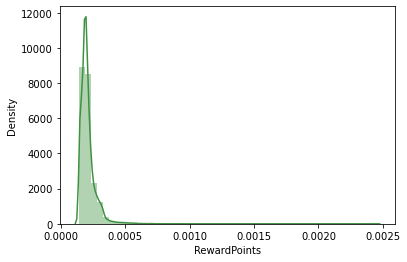

In [39]:
#RewardPoints variable scale to Reciprocal Transformation
rewpoints_rt = 1/train['RewardPoints']
sns.distplot(rewpoints_rt,color='#3D9140')

Lambda value used for Transformation: 1.6406849426366574


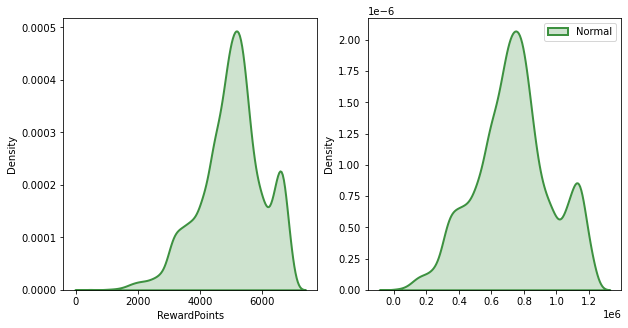

In [40]:
#Box Cox
# generate non-normal data (exponential)
rewpoints_boxcox = train_c['RewardPoints']
  
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(rewpoints_boxcox)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(rewpoints_boxcox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color='#3D9140', ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color='#3D9140', ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

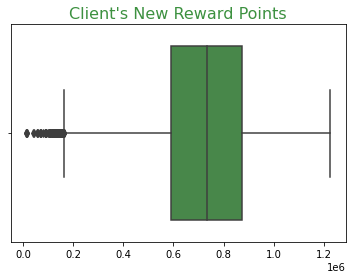

In [41]:
#Implementing the new RewardPoints
train_c['New_RewardPoints'] = fitted_data
train_c.head()

sns.boxplot(x='New_RewardPoints', data = train_c, color='#3D9140')
plt.title("Client's New Reward Points", size=16, color='#3D9140')
plt.xlabel(' ',size=1)

#Drop the old Reward Points
train_c.drop('RewardPoints', inplace=True, axis=1)


# 3.6. Feature Selection

In [42]:
#Checking if some variable is constant or var=0
train_c.var()

Churn                2.480992e-01
Longevity            1.503815e-01
Comfort              1.928275e+00
ReceptionSchedule    2.307344e+00
FoodDrink            2.064819e+00
Location             1.688539e+00
Wifi                 1.750578e+00
Amenities            1.829032e+00
Staff                1.741251e+00
OnlineBooking        1.717000e+00
PriceQuality         1.608154e+00
RoomSpace            1.674108e+00
CheckOut             1.342456e+00
Checkin              1.604966e+00
Cleanliness          1.332724e+00
BarService           1.691176e+00
Female               2.498667e-01
Age                  2.276244e+02
Leisure_Travel       2.139237e-01
Single_Room          2.495047e-01
Suite                6.701748e-02
New_RewardPoints     5.483344e+10
dtype: float64

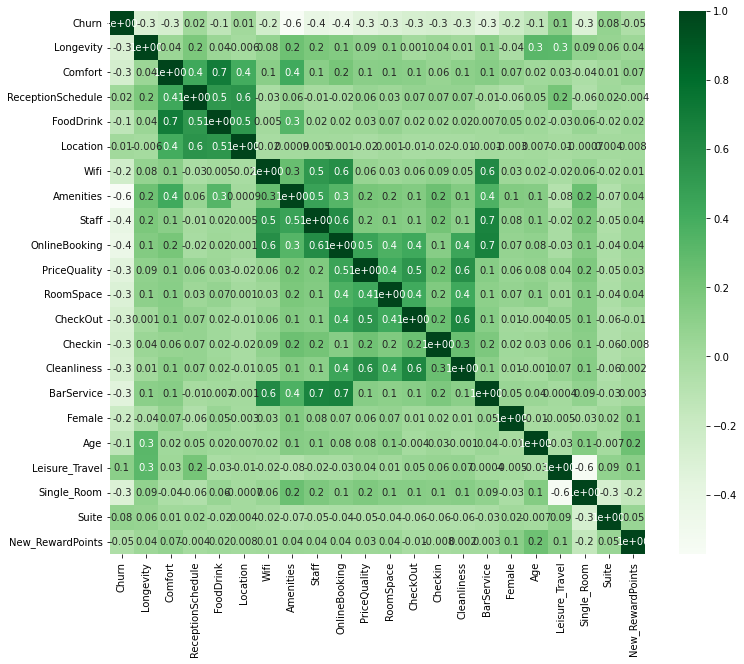

In [43]:
#Correlation Matrix_ Spearman Method
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = 'Greens', fmt='.1')
    plt.show()
    
cor_spearman = train_c.corr(method ='spearman')
cor_heatmap(cor_spearman)

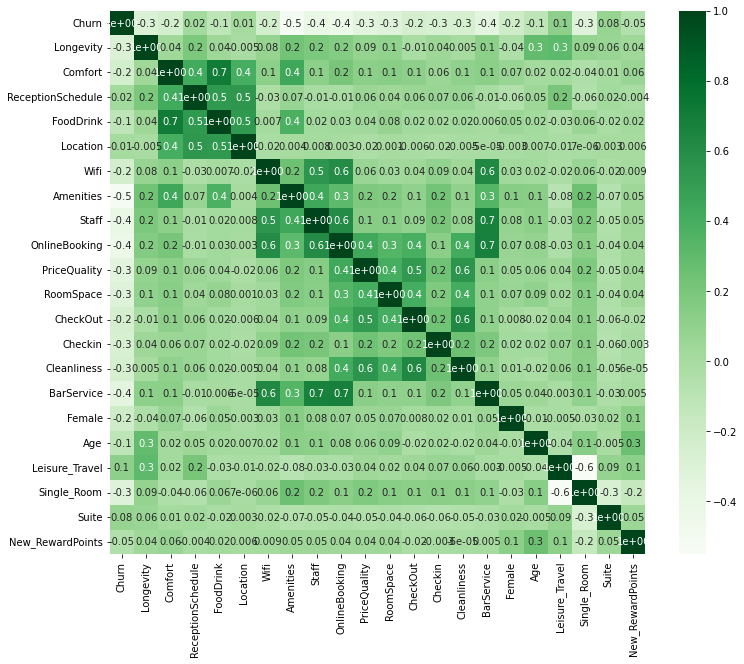

In [44]:
#Correlation Matrix - Person Method
cor_pearson = train_c.corr(method ='pearson')
cor_heatmap(cor_pearson)

In [45]:
#ANOVA
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

#Assining the data
A_data = train_c.drop('Churn', axis = 1)
A_target = train_c['Churn'].copy()

#Implementing the ANOVA
anova = SelectKBest(f_classif, k=16)

#Fitting 
X_anova = anova.fit_transform(A_data, A_target)

#Results
selected_features = pd.Series(anova.get_support(), index = A_data.columns)
selected_features

Longevity             True
Comfort               True
ReceptionSchedule    False
FoodDrink             True
Location             False
Wifi                  True
Amenities             True
Staff                 True
OnlineBooking         True
PriceQuality          True
RoomSpace             True
CheckOut              True
Checkin               True
Cleanliness           True
BarService            True
Female                True
Age                   True
Leisure_Travel       False
Single_Room           True
Suite                False
New_RewardPoints     False
dtype: bool

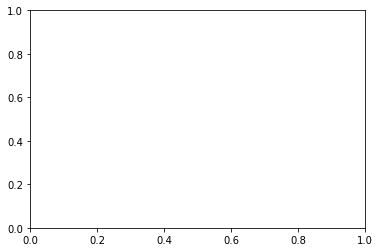

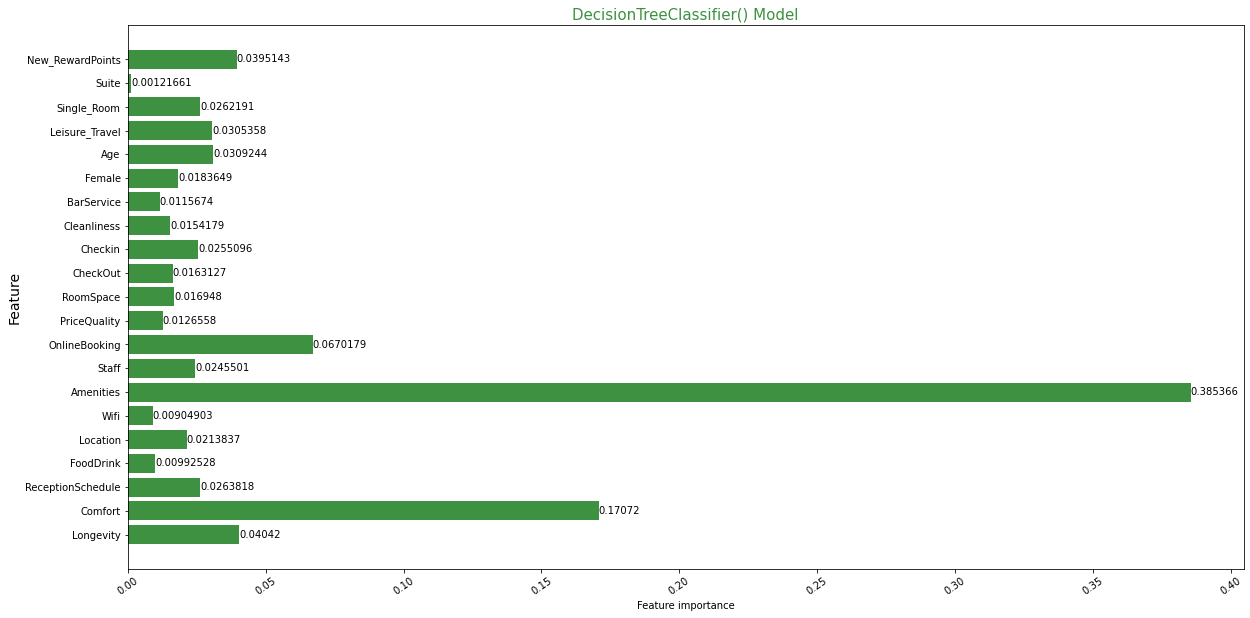

None


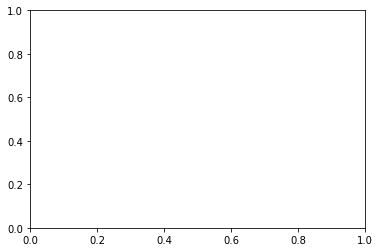

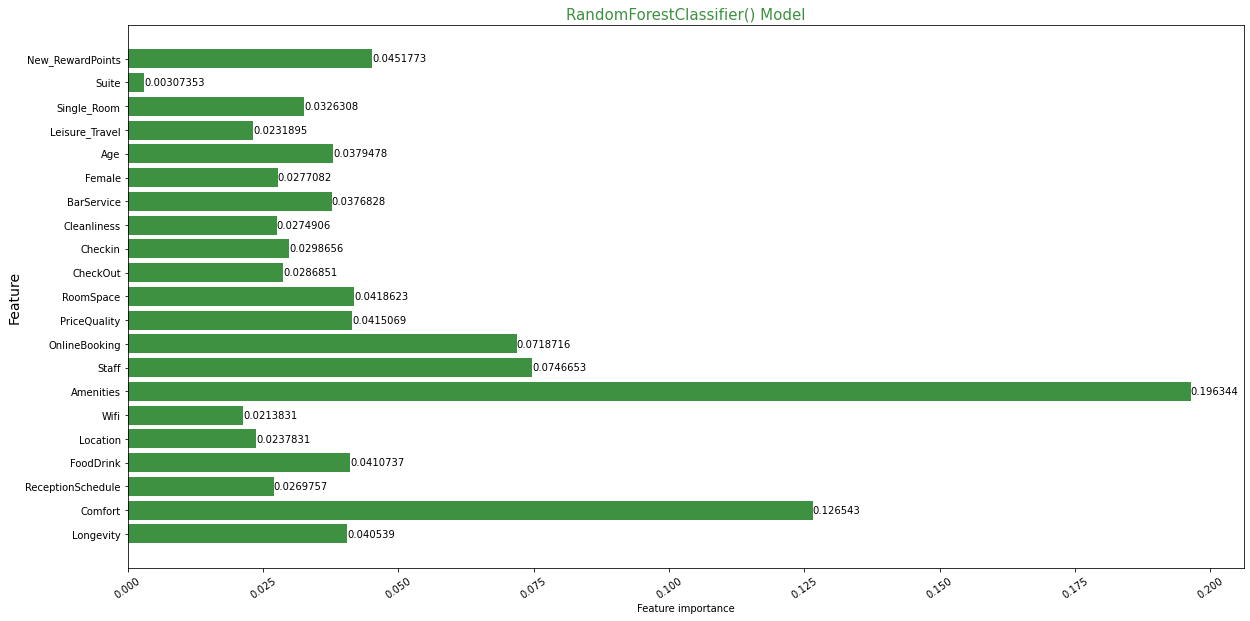

None


In [46]:
#Model Importance - Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Assining the data
DT_data = train_c.drop('Churn', axis = 1)
DT_target = train_c['Churn'].copy()

#Creating Model AND fit the model
#Decision Tree
DT_sel = DecisionTreeClassifier()
DT_sel.fit(DT_data, DT_target)
#Random Forest
F_sel = RandomForestClassifier()
F_sel.fit(DT_data, DT_target)

#Plot to see the most important features to this model
def plot_feature_importances(model):
    ax = plt.subplots()
    n_features = DT_data.shape[1]
    plt.figure(figsize=(20,10))
    axh=plt.barh(range(n_features), model.feature_importances_, align='center', color='#3D9140')
    plt.yticks(np.arange(n_features), DT_data.columns)
    plt.title(str(model)+" Model", color='#3D9140', size=15 )
    plt.xlabel('Feature importance', loc='center')
    plt.ylabel('Feature', loc='center', size=14)
    plt.xticks(rotation=35)
    plt.bar_label(axh)
    plt.show()

#Decision Tree
print(plot_feature_importances(DT_sel))
#Random Forest
print(plot_feature_importances(F_sel))

In [47]:
#Decision: By this we know we should remove suite!
train_c.drop('Suite', inplace=True, axis=1)

# 3.7. Scaling the Data

In [48]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

X_train_c = train_c.drop('Churn', axis = 1)
y_train_c = train_c['Churn']

scaler = MinMaxScaler().fit(X_train_c)
minmax_train_c = scaler.transform(X_train_c)

X_train_c = pd.DataFrame(minmax_train_c, columns = X_train_c.columns, index=X_train_c.index)
X_train_c.head()

Longevity  Comfort  ReceptionSchedule  FoodDrink  Location  Wifi  \
Cust_ID                                                                     
1              1.0      0.6                0.8        0.2      0.75   0.8   
2              1.0      0.2                0.2        0.2      0.00   1.0   
3              1.0      0.6                0.6        0.6      0.50   0.2   
4              1.0      0.2                0.2        0.2      0.00   0.8   
5              1.0      0.4                0.4        0.6      0.25   1.0   

         Amenities  Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  \
Cust_ID                                                                       
1              0.6   0.75            0.6          0.50        0.6      0.50   
2              0.6   0.75            1.0          1.00        1.0      1.00   
3              0.8   0.75            0.6          0.50        0.4      0.50   
4              0.8   1.00            0.8          0.75        0.8      0.75   
5              1.0   1.00            1.0          1.00        0.6      0.75   

         Checkin  Cleanliness  BarService  Female       Age  Leisure_Travel  \
Cust_ID                                                                       
1           0.75         0.50         0.8     1.0  0.525641             0.0   
2           0.00         1.00         0.4     0.0  0.641026             0.0   
3           0.25         0.50         0.2     0.0  0.525641             0.0   
4           0.75         0.75         0.6     1.0  0.282051             1.0   
5           0.00         0.50         1.0     0.0  0.333333             0.0   

         Single_Room  New_RewardPoints  
Cust_ID                                 
1                1.0          0.560701  
2                1.0          0.946695  
3                1.0          0.461044  
4                0.0          0.373256  
5                1.0          0.652851

# 4. Preparation of Validation Dataset

In [49]:
#Create a copy of validation
val_c = validation.copy()

#Transform CustID as index
val_c.set_index("Cust_ID", inplace=True)

#From Name we can get the gender! 
val_c['Gender'] = val_c['Name'].astype(str).str[0:2]
#So we transform Ms.n 1 and Mr.in O
val_c['Gender'].replace(['Ms', 'Mr'],[1,0], inplace = True)
#Rename it so we know
val_c.rename(columns = {'Gender': 'Female'}, inplace=True)
#Drop name
val_c.drop('Name', inplace=True, axis=1)


In [50]:
#We see that there is mmissing values, so isolate Year_Birth
YearBirthV= val_c[['Year_Birth']].copy()

#We scale Year Birth - then fill missing values with knn - inverse the input to get real values
scaler_vms = MinMaxScaler()
YearBirthV = pd.DataFrame(scaler_vms.fit_transform(YearBirthV),columns = YearBirthV.columns, index=val_c.index)
imputer_vms = KNNImputer(n_neighbors=5)
YearBirthV = pd.DataFrame(imputer_vms.fit_transform(YearBirthV),columns = YearBirthV.columns, index=val_c.index)

#We now undo the transformation to get the real values, to later transform in age:
YearBirthV = pd.DataFrame(scaler_vms.inverse_transform(YearBirthV),columns = YearBirthV.columns)
YearBirthV.index = val_c.index
#Delete old Year_Birth and Join this new Year_Birth to val_c
val_c.drop('Year_Birth', inplace=True, axis=1)


Lambda value used for Transformation: 1.6234678348506058


Longevity  Comfort  ReceptionSchedule  FoodDrink  Location  Wifi  \
Cust_ID                                                                     
20000          0.0      1.0                0.0        1.0      0.50   0.8   
20001          1.0      0.2                0.2        0.2      0.00   0.8   
20002          1.0      1.0                1.0        1.0      1.00   0.6   
20003          1.0      0.4                0.6        0.2      0.50   0.8   
20004          1.0      0.8                0.8        0.8      0.75   0.8   
...            ...      ...                ...        ...       ...   ...   
25190          1.0      0.8                0.8        0.8      0.75   0.4   
25191          1.0      0.8                0.4        0.4      0.25   0.8   
25192          1.0      1.0                0.2        0.2      0.00   1.0   
25193          1.0      0.8                0.2        0.8      0.75   0.2   
25194          1.0      1.0                0.2        0.8      0.00   1.0   

         Amenities  Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  \
Cust_ID                                                                       
20000          1.0   0.75            0.8          0.50        0.4      0.75   
20001          0.8   0.75            1.0          1.00        1.0      1.00   
20002          0.2   0.00            1.0          1.00        1.0      0.75   
20003          0.8   0.75            0.4          0.25        0.4      0.25   
20004          1.0   0.75            0.6          0.50        0.8      0.50   
...            ...    ...            ...           ...        ...       ...   
25190          0.6   0.00            1.0          1.00        1.0      1.00   
25191          0.8   0.75            0.8          0.25        0.8      0.25   
25192          1.0   1.00            0.8          0.75        0.4      0.00   
25193          1.0   0.75            1.0          1.00        1.0      0.75   
25194          1.0   1.00            1.0          0.25        1.0      0.00   

         Checkin  Cleanliness  BarService  Female       Age  Leisure_Travel  \
Cust_ID                                                                       
20000       0.50         0.75         0.8     0.0  0.179487             0.0   
20001       1.00         1.00         1.0     0.0  0.641026             0.0   
20002       1.00         1.00         1.0     1.0  0.269231             1.0   
20003       0.75         0.25         0.8     1.0  0.410256             0.0   
20004       0.75         0.50         0.6     1.0  0.666667             0.0   
...          ...          ...         ...     ...       ...             ...   
25190       1.00         1.00         1.0     1.0  0.448718             0.0   
25191       0.75         0.50         0.8     0.0  0.269231             0.0   
25192       1.00         0.25         1.0     1.0  0.756410             0.0   
25193       0.25         1.00         0.2     0.0  0.423077             0.0   
25194       0.25         0.50         1.0     1.0  0.782051             1.0   

         Single_Room  New_RewardPoints  
Cust_ID                                 
20000            1.0          0.424862  
20001            1.0          0.624667  
20002            0.0          0.419869  
20003            1.0          0.345800  
20004            1.0          0.628468  
...              ...               ...  
25190            1.0          0.790106  
25191            1.0          0.390687  
25192            0.0          0.662145  
25193            1.0          0.550320  
25194            0.0          0.760673  

[5195 rows x 20 columns]

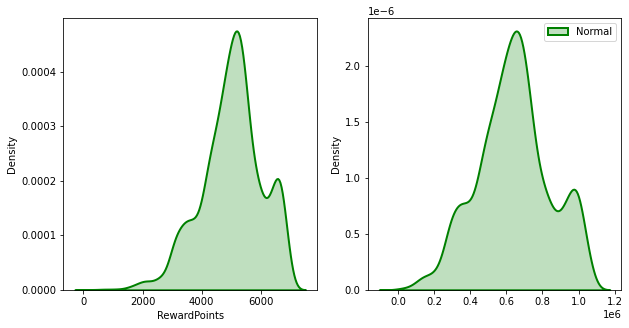

In [51]:
val_c = pd.concat([val_c, YearBirthV], axis=1) 

#year to age
val_c['Age'] = date.today().year - val_c['Year_Birth']

#drop year
val_c.drop('Year_Birth', inplace=True, axis=1)

#Convert Data types
val_c['Age'] = val_c['Age'].astype('int32')

#Coeherence of Ratings on Wifi - Transform the 6 in 5 -> although not necessary
val_c['Wifi'].replace(6,5, inplace = True)

#Coherence of Longevity - same thinking y-> yes
val_c['Longevity'].replace('y', 'yes', inplace=True)

#Transform Churn/Longevity to 0,1 and other categorical variables*
val_c.replace(['churn', 'nochurn'], [1, 0], inplace=True)
val_c['Longevity'].replace(['yes', 'no'], [1,0], inplace=True)

#We create dummy variables for Type of Travel and Room Type, since they had only 2 and 3 categories, respectively
categorical_valdat = val_c[['TypeTravel', 'RoomType']].copy()
valdummy=pd.get_dummies(categorical_valdat, drop_first=True)

#merge val_c and ours dummmy variables
val_c = pd.concat([val_c, valdummy], axis=1) #saw in the internet, outter join by index
val_c.drop(['TypeTravel', 'RoomType'], inplace=True, axis=1) 

#change the names of the new variables:
val_c.rename(columns = {'TypeTravel_leisure': 'Leisure_Travel', 'RoomType_single': 'Single_Room', 'RoomType_suite' : 'Suite'}, inplace=True)

#Treating Outliers by Box Cox
# generate non-normal data (exponential)
rewpoints_boxcoxv = val_c['RewardPoints']
# transform training data & save lambda value
fitted_datav, fitted_lambdav = stats.boxcox(rewpoints_boxcoxv)
# creating axes to draw plots
fig_v, ax_v = plt.subplots(1, 2)
# plotting the original data(non-normal) and fitted data (normal)
sns.distplot(rewpoints_boxcoxv, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax_v[0])
  
sns.distplot(fitted_datav, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax_v[1])
# adding legends to the subplots
plt.legend(loc = "upper right")
# rescaling the subplots
fig_v.set_figheight(5)
fig_v.set_figwidth(10)
print(f"Lambda value used for Transformation: {fitted_lambdav}")

#Implementing the new RewardPoints
val_c['New_RewardPoints'] = fitted_datav

#Drop the old Reward Points
val_c.drop('RewardPoints', inplace=True, axis=1)

#Removing Location from the Analysis future selection
val_c.drop('Suite', inplace=True, axis=1)

#Scaling to train_c
X_val_c = val_c.drop('Churn', axis = 1)
y_val_c = val_c['Churn']

minmax_val_c = scaler.transform(X_val_c)

X_val_c = pd.DataFrame(minmax_val_c, columns = X_val_c.columns, index=X_val_c.index)
X_val_c


# 5. Preparation of Test Dataset

In [52]:
#Create a copy of test
test_c = test.copy()

#Transform CustID as index
test_c.set_index("Cust_ID", inplace=True)

#From Name we can get the gender! 
test_c['Gender'] = test_c['Name'].astype(str).str[0:2]
#So we transform Ms.n 1 and Mr.in O
test_c['Gender'].replace(['Ms', 'Mr'],[1,0], inplace = True)
#Rename it so we know
test_c.rename(columns = {'Gender': 'Female'}, inplace=True)
#Drop name
test_c.drop('Name', inplace=True, axis=1)


In [53]:
#We see that there is missing values, so isolate Year_Birth
YearBirthT= test_c[['Year_Birth']].copy()

#We scale Year Birth - then fill missing values with knn - inverse the input to get real values
scaler_tms = MinMaxScaler()
YearBirthT = pd.DataFrame(scaler_tms.fit_transform(YearBirthT), columns = YearBirthT.columns, index=test_c.index)
imputer_tms = KNNImputer(n_neighbors=5)
YearBirthT = pd.DataFrame(imputer_tms.fit_transform(YearBirthT), columns = YearBirthT.columns, index=test_c.index)

#We now undo the transformation to get the real values, to later transform in age:
YearBirthT = pd.DataFrame(scaler_tms.inverse_transform(YearBirthT),columns = YearBirthT.columns)
YearBirthT.index = test_c.index

#Delete old Year_Birth and Join this new Year_Birth to val_c
test_c.drop('Year_Birth', inplace=True, axis=1)

Lambda value used for Transformation: 1.657954092726252


Longevity  Comfort  ReceptionSchedule  FoodDrink  Location  Wifi  \
Cust_ID                                                                     
20000          0.0      1.0                0.0        1.0      0.50   0.8   
20001          1.0      0.2                0.2        0.2      0.00   0.8   
20002          1.0      1.0                1.0        1.0      1.00   0.6   
20003          1.0      0.4                0.6        0.2      0.50   0.8   
20004          1.0      0.8                0.8        0.8      0.75   0.8   
...            ...      ...                ...        ...       ...   ...   
25190          1.0      0.8                0.8        0.8      0.75   0.4   
25191          1.0      0.8                0.4        0.4      0.25   0.8   
25192          1.0      1.0                0.2        0.2      0.00   1.0   
25193          1.0      0.8                0.2        0.8      0.75   0.2   
25194          1.0      1.0                0.2        0.8      0.00   1.0   

         Amenities  Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  \
Cust_ID                                                                       
20000          1.0   0.75            0.8          0.50        0.4      0.75   
20001          0.8   0.75            1.0          1.00        1.0      1.00   
20002          0.2   0.00            1.0          1.00        1.0      0.75   
20003          0.8   0.75            0.4          0.25        0.4      0.25   
20004          1.0   0.75            0.6          0.50        0.8      0.50   
...            ...    ...            ...           ...        ...       ...   
25190          0.6   0.00            1.0          1.00        1.0      1.00   
25191          0.8   0.75            0.8          0.25        0.8      0.25   
25192          1.0   1.00            0.8          0.75        0.4      0.00   
25193          1.0   0.75            1.0          1.00        1.0      0.75   
25194          1.0   1.00            1.0          0.25        1.0      0.00   

         Checkin  Cleanliness  BarService  Female       Age  Leisure_Travel  \
Cust_ID                                                                       
20000       0.50         0.75         0.8     0.0  0.179487             0.0   
20001       1.00         1.00         1.0     0.0  0.641026             0.0   
20002       1.00         1.00         1.0     1.0  0.269231             1.0   
20003       0.75         0.25         0.8     1.0  0.410256             0.0   
20004       0.75         0.50         0.6     1.0  0.666667             0.0   
...          ...          ...         ...     ...       ...             ...   
25190       1.00         1.00         1.0     1.0  0.448718             0.0   
25191       0.75         0.50         0.8     0.0  0.269231             0.0   
25192       1.00         0.25         1.0     1.0  0.756410             0.0   
25193       0.25         1.00         0.2     0.0  0.423077             0.0   
25194       0.25         0.50         1.0     1.0  0.782051             1.0   

         Single_Room  New_RewardPoints  
Cust_ID                                 
20000            1.0          0.424862  
20001            1.0          0.624667  
20002            0.0          0.419869  
20003            1.0          0.345800  
20004            1.0          0.628468  
...              ...               ...  
25190            1.0          0.790106  
25191            1.0          0.390687  
25192            0.0          0.662145  
25193            1.0          0.550320  
25194            0.0          0.760673  

[5195 rows x 20 columns]

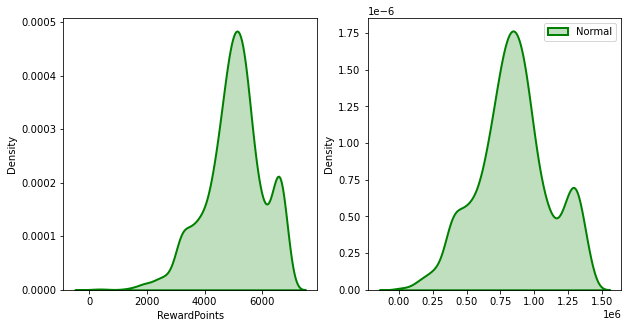

In [54]:
test_c = pd.concat([test_c, YearBirthT], axis=1) 

#year to age
test_c['Age'] = date.today().year - test_c['Year_Birth']

#drop year
test_c.drop('Year_Birth', inplace=True, axis=1)

#Convert Data types
test_c['Age'] = test_c['Age'].astype('int32')

#Coeherence of Ratings on Wifi - Transform the 6 in 5 -> although not necessary
test_c['Wifi'].replace(6,5, inplace = True)

#Coherence of Longevity - same thinking y-> yes
test_c['Longevity'].replace('y', 'yes', inplace=True)

#Transform Churn/Longevity to 0,1 and other categorical variables*
test_c.replace(['churn', 'nochurn'], [1, 0], inplace=True)
test_c['Longevity'].replace(['yes', 'no'], [1,0], inplace=True)

#We create dummy variables for Type of Travel and Room Type, since they had only 2 and 3 categories, respectively
categorical_testdat = test_c[['TypeTravel', 'RoomType']].copy()
testdummy=pd.get_dummies(categorical_testdat, drop_first=True)

#merge val_c and ours dummmy variables
test_c = pd.concat([test_c, testdummy], axis=1) #saw in the internet, outter join by index
test_c.drop(['TypeTravel', 'RoomType'], inplace=True, axis=1) 

#change the names of the new variables:
test_c.rename(columns = {'TypeTravel_leisure': 'Leisure_Travel', 'RoomType_single': 'Single_Room', 'RoomType_suite' : 'Suite'}, inplace=True)

#Treating Outliers by Box Cox
# generate non-normal data (exponential)
rewpoints_boxcoxt = test_c['RewardPoints']
# transform training data & save lambda value
fitted_datat, fitted_lambdat = stats.boxcox(rewpoints_boxcoxt)
# creating axes to draw plots
fig_t, ax_t = plt.subplots(1, 2)
# plotting the original data(non-normal) and fitted data (normal)
sns.distplot(rewpoints_boxcoxt, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax_t[0])
  
sns.distplot(fitted_datat, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax_t[1])
# adding legends to the subplots
plt.legend(loc = "upper right")
# rescaling the subplots
fig_t.set_figheight(5)
fig_t.set_figwidth(10)
print(f"Lambda value used for Transformation: {fitted_lambdat}")

#Implementing the new RewardPoints
test_c['New_RewardPoints'] = fitted_datat

#Drop the old Reward Points
test_c.drop('RewardPoints', inplace=True, axis=1)

#Removing Location from the Analysis future selection
test_c.drop('Suite', inplace=True, axis=1)


In [74]:
#Scaling to train_c
X_test_c = test_c.copy()

minmax_test_c = scaler.transform(X_test_c)

X_test_c = pd.DataFrame(minmax_test_c, columns = X_test_c.columns, index=X_test_c.index)
X_test_c


Longevity  Comfort  ReceptionSchedule  FoodDrink  Location  Wifi  \
Cust_ID                                                                     
30000          1.0      0.4                0.8        0.4      0.25   0.2   
30001          1.0      0.4                0.8        0.4      0.00   0.8   
30002          0.0      1.0                0.8        0.8      0.50   0.4   
30003          1.0      0.8                1.0        0.8      0.50   0.6   
30004          1.0      0.8                0.4        0.4      0.25   1.0   
...            ...      ...                ...        ...       ...   ...   
35190          1.0      0.4                0.6        0.6      0.50   0.4   
35191          1.0      1.0                0.4        0.4      0.25   1.0   
35192          1.0      0.6                0.2        0.2      0.00   0.6   
35193          1.0      0.2                1.0        0.0      0.50   1.0   
35194          1.0      0.2                0.2        0.2      0.00   0.6   

         Amenities  Staff  OnlineBooking  PriceQuality  RoomSpace  CheckOut  \
Cust_ID                                                                       
30000          0.4   0.00            0.2          1.00        0.6      0.75   
30001          0.4   0.75            0.8          0.75        1.0      0.75   
30002          0.8   0.00            0.4          1.00        1.0      1.00   
30003          0.8   0.50            0.6          0.50        1.0      1.00   
30004          0.8   0.50            0.8          0.75        0.8      0.75   
...            ...    ...            ...           ...        ...       ...   
35190          0.6   0.50            0.4          0.25        0.6      0.25   
35191          1.0   1.00            1.0          0.50        0.4      0.50   
35192          0.6   0.50            0.6          0.50        0.8      0.75   
35193          0.0   1.00            1.0          0.50        0.6      0.75   
35194          0.8   0.75            1.0          1.00        1.0      1.00   

         Checkin  Cleanliness  BarService  Female       Age  Leisure_Travel  \
Cust_ID                                                                       
30000       0.75         0.75         0.2     0.0  0.756410             1.0   
30001       0.50         0.00         0.8     0.0  0.141026             1.0   
30002       0.50         0.75         0.4     0.0  0.294872             0.0   
30003       0.50         0.75         0.6     0.0  0.371795             1.0   
30004       0.75         0.75         0.8     1.0  0.576923             0.0   
...          ...          ...         ...     ...       ...             ...   
35190       0.50         0.25         0.8     1.0  0.717949             0.0   
35191       0.75         0.00         1.0     0.0  0.564103             0.0   
35192       0.00         0.50         0.6     0.0  0.782051             0.0   
35193       1.00         0.75         1.0     0.0  0.474359             1.0   
35194       1.00         1.00         0.8     0.0  0.435897             0.0   

         Single_Room  New_RewardPoints  
Cust_ID                                 
30000            0.0          0.800187  
30001            0.0          0.895098  
30002            1.0          0.692149  
30003            0.0          0.732349  
30004            0.0          0.914528  
...              ...               ...  
35190            1.0          1.097485  
35191            0.0          0.893842  
35192            0.0          0.750084  
35193            0.0          0.526847  
35194            1.0          0.387791  

[5195 rows x 20 columns]

# 6. Modelling and Assessment

   # 6.1. Logestic Regression Model

In [55]:
#Importing the Logestic Regression Model
from sklearn.linear_model import LogisticRegression

#Creating the Logestic Regression model and Fitting the model
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_c, y_train_c)

#Getting the redictions
labels_train_lr = log_reg.predict(X_train_c)
labels_val_lr = log_reg.predict(X_val_c)

#Predictions Probabilities
log_reg.predict_proba(X_val_c)

#Imports Needed to make the evaluations
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train_c, labels_train_lr))
print(confusion_matrix(y_train_c, labels_train_lr))
print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val_c, labels_val_lr))
print(confusion_matrix(y_val_c, labels_val_lr))
print('--------------------- RESULTS ---------------------')
print('Train:', f1_score(y_train_c, labels_train_lr))
print('Validation:', f1_score(y_val_c, labels_val_lr))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      8477
           1       0.80      0.84      0.82      7112

    accuracy                           0.83     15589
   macro avg       0.83      0.84      0.83     15589
weighted avg       0.84      0.83      0.83     15589

[[7007 1470]
 [1108 6004]]
--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2831
           1       0.80      0.86      0.83      2364

    accuracy                           0.84      5195
   macro avg       0.83      0.84      0.83      5195
weighted avg       0.84      0.84      0.84      5195

[[2312  519]
 [ 337 2027]]
--------------------- RESULTS ---------------------
Train: 0.8232551761963526
Validation: 0.8256619144602851


# 6.2. Model K-Nearest Neighbors


In [56]:
#Importing the model
from sklearn.neighbors import KNeighborsClassifier

#Creating the Knn model and Fitting the model
model_KNN = KNeighborsClassifier()
model_KNN.fit(X = X_train_c, y = y_train_c)

#Getting the predictions
labels_train_knn = model_KNN.predict(X_train_c)
labels_val_knn = model_KNN.predict(X_val_c)

#Predictions Probabilities
print(model_KNN.predict_proba(X_val_c))

#Evaluation with default parameters:
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train_c, labels_train_knn))
print(confusion_matrix(y_train_c, labels_train_knn))

print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val_c, labels_val_knn))
print(confusion_matrix(y_val_c, labels_val_knn))

print('--------------------- RESULTS ---------------------')
print('Train:', model_KNN.score(X_train_c, y_train_c))
print('Validation:', model_KNN.score(X_val_c, y_val_c))

[[0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 ...
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]]
----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8477
           1       0.91      0.95      0.93      7112

    accuracy                           0.93     15589
   macro avg       0.93      0.94      0.93     15589
weighted avg       0.94      0.93      0.93     15589

[[7816  661]
 [ 355 6757]]
--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2831
           1       0.86      0.93      0.90      2364

    accuracy                           0.90      5195
   macro avg       0.90      0.90      0.90      5195
weighted avg       0.90      0.90      0.90      5195

[[2485  346]
 [ 162 2202]]
--------------------- RESULTS ---------------------
Train: 0.9348258387324395
Validation: 0.902213666987488


In [57]:
#Trying to see the best number of neighbors
neighbors_list=[1,2,3,4,5,6,7,8,9,10]          

for n in neighbors_list:
    model_k2 = KNeighborsClassifier(n_neighbors=n).fit(X_train_c, y_train_c)
    labels_train_knn = model_k2.predict(X_train_c)
    labels_val_knn = model_k2.predict(X_val_c)
    
    print('With a number of neighbors equal to ' + str(n) + ':')
    print('Train:' + str(f1_score(y_train_c, labels_train_knn)))
    print('Validation:' + str(f1_score(y_val_c, labels_val_knn)))
    print('')
    
#By this we conclude that 6/8 neighbors are the best

With a number of neighbors equal to 1:
Train:1.0
Validation:0.8882038635429512

With a number of neighbors equal to 2:
Train:0.9491725768321513
Validation:0.8795260039499672

With a number of neighbors equal to 3:
Train:0.9432477216238608
Validation:0.8999391110209052

With a number of neighbors equal to 4:
Train:0.9321828424730799
Validation:0.8977871443624867

With a number of neighbors equal to 5:
Train:0.9300757054370269
Validation:0.8965798045602605

With a number of neighbors equal to 6:
Train:0.925303913990584
Validation:0.8992312487014337

With a number of neighbors equal to 7:
Train:0.9220404234841194
Validation:0.8972950986373806

With a number of neighbors equal to 8:
Train:0.9189983212087298
Validation:0.8998968008255934

With a number of neighbors equal to 9:
Train:0.9169640406258579
Validation:0.8956433637284701

With a number of neighbors equal to 10:
Train:0.914186127570582
Validation:0.8979170963085172



In [58]:
#Creating the KNN with custom parameters and Fitting the model
modelKNN_custom = KNeighborsClassifier(n_neighbors=6)
modelKNN_custom.fit(X = X_train_c, y = y_train_c)

#Getting the predictions
labels_train_knncust = modelKNN_custom.predict(X_train_c)
labels_val_knncust = modelKNN_custom.predict(X_val_c)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train_c, labels_train_knncust))
print(confusion_matrix(y_train_c, labels_train_knncust))

print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val_c, labels_val_knncust))
print(confusion_matrix(y_val_c, labels_val_knncust))

print('--------------------- RESULTS ---------------------')
print('Train:', modelKNN_custom.score(X_train_c, y_train_c))
print('Validation:', modelKNN_custom.score(X_val_c, y_val_c))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8477
           1       0.92      0.93      0.93      7112

    accuracy                           0.93     15589
   macro avg       0.93      0.93      0.93     15589
weighted avg       0.93      0.93      0.93     15589

[[7942  535]
 [ 528 6584]]
--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2831
           1       0.88      0.92      0.90      2364

    accuracy                           0.91      5195
   macro avg       0.91      0.91      0.91      5195
weighted avg       0.91      0.91      0.91      5195

[[2546  285]
 [ 200 2164]]
--------------------- RESULTS ---------------------
Train: 0.9318108922958497
Validation: 0.9066410009624639


# 6.3. Decision Trees

In [59]:
#Import Decison Tree Model and material to work the decision tree
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier

#Creating Model AND fit the model
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_c, y_train_c)

#Getting the predictions
labels_dt_tr = model_DT.predict(X_train_c)
labels_dt_val = model_DT.predict(X_val_c)

In [60]:
#Decision Tree Map
dot_data = tree.export_graphviz(model_DT, out_file=None, 
                     feature_names=X_train_c.columns,  
                     class_names=["No Churn", "Churn"],  # only to classification problems
                     filled=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"25,25!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [61]:
#Information About Decision Tree
print('The defined three has a depth of ' + str(model_DT.get_depth()) + ', ' + str(model_DT.tree_.node_count) + 
      ' nodes and a total of ' + str(model_DT.get_n_leaves()) + ' leaves.')

The defined three has a depth of 30, 1997 nodes and a total of 999 leaves.


In [62]:
#Evaluation -> With default parameter
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train_c, labels_dt_tr))
print(confusion_matrix(y_train_c, labels_dt_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val_c, labels_dt_val))
print(confusion_matrix(y_val_c, labels_dt_val))

print('--------------------- RESULTS ---------------------')
print('Train:', model_DT.score(X_train_c, y_train_c))
print('Validation:', model_DT.score(X_val_c, y_val_c))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8477
           1       1.00      1.00      1.00      7112

    accuracy                           1.00     15589
   macro avg       1.00      1.00      1.00     15589
weighted avg       1.00      1.00      1.00     15589

[[8477    0]
 [   0 7112]]
--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2831
           1       0.90      0.91      0.91      2364

    accuracy                           0.91      5195
   macro avg       0.91      0.91      0.91      5195
weighted avg       0.91      0.91      0.91      5195

[[2605  226]
 [ 222 2142]]
--------------------- RESULTS ---------------------
Train: 1.0
Validation: 0.9137632338787296


In [63]:
#Lets try to discover both the best deph and nº of leaf nodes for our model:
depth_list=list(range(6,20)) 

#Interation to see the best depth
print("--------------Depth-------------")
for n in depth_list:
    model_dt2 = DecisionTreeClassifier(max_depth = n).fit(X_train_c, y_train_c)
    labels_train_dt = model_dt2.predict(X_train_c)
    labels_val_dt = model_dt2.predict(X_val_c)
    
    print('With depth of ' + str(n) + ':')
    print('Train:' + str(f1_score(y_train_c, labels_train_dt)))
    print('Validation:' + str(f1_score(y_val_c, labels_val_dt)))
    print('')
#it's depth:10

#Interation to see the best number of leaf nodes
node_list=list(range(20,1000))
print("--------------Leaves-------------")
for n in node_list:
    model_dt3 = DecisionTreeClassifier(max_leaf_nodes=n,max_depth = 10).fit(X_train_c, y_train_c)
    labels_train_dt = model_dt3.predict(X_train_c)
    labels_val_dt = model_dt3.predict(X_val_c)
    
    print('Nº of leaves ' + str(n) + ':')
    print('Train:' + str(f1_score(y_train_c, labels_train_dt)))
    print('Validation:' + str(f1_score(y_val_c, labels_val_dt)))
    print('')

--------------Depth-------------
With depth of 6:
Train:0.8948177119709457
Validation:0.8943894389438944

With depth of 7:
Train:0.9071277346506704
Validation:0.9043732998535259

With depth of 8:
Train:0.9256048105160118
Validation:0.9142857142857144

With depth of 9:
Train:0.936914253741782
Validation:0.9194054846137742

With depth of 10:
Train:0.9464721892665224
Validation:0.9188399749634885

With depth of 11:
Train:0.9558925838319188
Validation:0.9208333333333333

With depth of 12:
Train:0.9615546513259435
Validation:0.912236286919831

With depth of 13:
Train:0.9697224558452482
Validation:0.9142857142857143

With depth of 14:
Train:0.9754760733609725
Validation:0.9162479061976548

With depth of 15:
Train:0.9812140754240852
Validation:0.911493288590604

With depth of 16:
Train:0.9856613275512346
Validation:0.9117955164466792

With depth of 17:
Train:0.9905269805627674
Validation:0.9106203995793902

With depth of 18:
Train:0.9924907011018317
Validation:0.9088618227635447

With depth o

Train:0.9304238706079198
Validation:0.9191329720716965

Nº of leaves 119:
Train:0.930553618742156
Validation:0.9191329720716965

Nº of leaves 120:
Train:0.9307413600891862
Validation:0.9193917933763798

Nº of leaves 121:
Train:0.9310008363534988
Validation:0.9197749531152323

Nº of leaves 122:
Train:0.9311210262130507
Validation:0.9195498124218425

Nº of leaves 123:
Train:0.931409452112087
Validation:0.9201917066055428

Nº of leaves 124:
Train:0.9317787493927406
Validation:0.9188628346129902

Nº of leaves 125:
Train:0.932168123179359
Validation:0.919535462463708

Nº of leaves 126:
Train:0.9322880532815319
Validation:0.9193113461937357

Nº of leaves 127:
Train:0.9321763276640055
Validation:0.9196928823407347

Nº of leaves 128:
Train:0.9322963683077565
Validation:0.9194686591946866

Nº of leaves 129:
Train:0.9326849600555748
Validation:0.9200415368639668

Nº of leaves 130:
Train:0.9326943113148572
Validation:0.9202657807308969

Nº of leaves 131:
Train:0.9326943113148572
Validation:0.9204

Nº of leaves 233:
Train:0.9434067465848898
Validation:0.9194588969823101

Nº of leaves 234:
Train:0.9434067465848898
Validation:0.9188514357053683

Nº of leaves 235:
Train:0.9434304026752125
Validation:0.9193347193347193

Nº of leaves 236:
Train:0.9434646218194493
Validation:0.921793534932221

Nº of leaves 237:
Train:0.9435276094979458
Validation:0.9210307564422278

Nº of leaves 238:
Train:0.9436011697535163
Validation:0.9203907711494491

Nº of leaves 239:
Train:0.9436855310844717
Validation:0.9198417655631898

Nº of leaves 240:
Train:0.94371992468094
Validation:0.9197415051073587

Nº of leaves 241:
Train:0.9437482595377331
Validation:0.9209650582362728

Nº of leaves 242:
Train:0.9438296095218207
Validation:0.9200415368639668

Nº of leaves 243:
Train:0.9438750610053684
Validation:0.920767306088407

Nº of leaves 244:
Train:0.9439376001114284
Validation:0.920549084858569

Nº of leaves 245:
Train:0.9440535079774264
Validation:0.9207075962539022

Nº of leaves 246:
Train:0.9441426382504526


Nº of leaves 347:
Train:0.9463040446304045
Validation:0.9201917066055428

Nº of leaves 348:
Train:0.9463612236345859
Validation:0.9201251303441084

Nº of leaves 349:
Train:0.9463462344557776
Validation:0.921179176249216

Nº of leaves 350:
Train:0.946421096693177
Validation:0.9208933416823211

Nº of leaves 351:
Train:0.946421096693177
Validation:0.9208003334722801

Nº of leaves 352:
Train:0.9463625584152892
Validation:0.9211514392991239

Nº of leaves 353:
Train:0.9461989938513136
Validation:0.9196074337022343

Nº of leaves 354:
Train:0.9464796594794501
Validation:0.921217173822426

Nº of leaves 355:
Train:0.9464871276076188
Validation:0.9200918005424579

Nº of leaves 356:
Train:0.9461989938513136
Validation:0.9196409935295345

Nº of leaves 357:
Train:0.9463401018770498
Validation:0.9203170629954109

Nº of leaves 358:
Train:0.9462215393211343
Validation:0.9201838696197242

Nº of leaves 359:
Train:0.9463625584152892
Validation:0.9201584323535543

Nº of leaves 360:
Train:0.9462230592174095

Nº of leaves 461:
Train:0.9463911768811949
Validation:0.9185246926443009

Nº of leaves 462:
Train:0.9462740720066984
Validation:0.9196502914238135

Nº of leaves 463:
Train:0.9461479360201159
Validation:0.9199582027168234

Nº of leaves 464:
Train:0.9464061409630147
Validation:0.9200584429137966

Nº of leaves 465:
Train:0.9461989938513136
Validation:0.9198998748435544

Nº of leaves 466:
Train:0.9463401018770498
Validation:0.9185586336179963

Nº of leaves 467:
Train:0.9464285714285715
Validation:0.9195833333333333

Nº of leaves 468:
Train:0.9464435146443514
Validation:0.9213764337851928

Nº of leaves 469:
Train:0.9462590731434952
Validation:0.918648310387985

Nº of leaves 470:
Train:0.946183953033268
Validation:0.9189640768588136

Nº of leaves 471:
Train:0.9464796594794501
Validation:0.9198329853862213

Nº of leaves 472:
Train:0.946295132341644
Validation:0.9200250574232617

Nº of leaves 473:
Train:0.9461989938513136
Validation:0.9202505219206679

Nº of leaves 474:
Train:0.946436044078672

Train:0.946183953033268
Validation:0.9198329853862213

Nº of leaves 573:
Train:0.9461554577833647
Validation:0.9208003334722801

Nº of leaves 574:
Train:0.9462215393211343
Validation:0.9196074337022343

Nº of leaves 575:
Train:0.9462801257422283
Validation:0.9207941483803553

Nº of leaves 576:
Train:0.9462305600111585
Validation:0.9195498124218425

Nº of leaves 577:
Train:0.9464796594794501
Validation:0.9197749531152323

Nº of leaves 578:
Train:0.946295132341644
Validation:0.9207342511472674

Nº of leaves 579:
Train:0.9463687150837988
Validation:0.9211185308848081

Nº of leaves 580:
Train:0.9462590731434952
Validation:0.9188399749634885

Nº of leaves 581:
Train:0.9463312368972747
Validation:0.9189302131216046

Nº of leaves 582:
Train:0.9462890625
Validation:0.9193917933763798

Nº of leaves 583:
Train:0.9462230592174095
Validation:0.9193581996249219

Nº of leaves 584:
Train:0.946338736724427
Validation:0.9197324414715718

Nº of leaves 585:
Train:0.9462890625
Validation:0.919774953115232

Train:0.9463687150837988
Validation:0.9207011686143572

Nº of leaves 685:
Train:0.9461479360201159
Validation:0.9202838063439064

Nº of leaves 686:
Train:0.9462305600111585
Validation:0.9197415051073587

Nº of leaves 687:
Train:0.9462305600111585
Validation:0.9198083732555719

Nº of leaves 688:
Train:0.9462890625
Validation:0.9199332777314428

Nº of leaves 689:
Train:0.9463986599664992
Validation:0.9191329720716965

Nº of leaves 690:
Train:0.9464647169679626
Validation:0.9207342511472674

Nº of leaves 691:
Train:0.9464048633917966
Validation:0.9205353408615642

Nº of leaves 692:
Train:0.9464796594794501
Validation:0.920767306088407

Nº of leaves 693:
Train:0.9463986599664992
Validation:0.9204758922980588

Nº of leaves 694:
Train:0.946436044078672
Validation:0.9210252135861638

Nº of leaves 695:
Train:0.9462665736217725
Validation:0.919482686691698

Nº of leaves 696:
Train:0.9462140262643196
Validation:0.9206017551190974

Nº of leaves 697:
Train:0.946421096693177
Validation:0.9207673060

Train:0.9462665736217725
Validation:0.9205753595997499

Nº of leaves 798:
Train:0.9464123524069028
Validation:0.9195162635529608

Nº of leaves 799:
Train:0.9464285714285715
Validation:0.9190654985398414

Nº of leaves 800:
Train:0.9463700397517261
Validation:0.9205753595997499

Nº of leaves 801:
Train:0.9463625584152892
Validation:0.9200584429137966

Nº of leaves 802:
Train:0.9461989938513136
Validation:0.9189076506149677

Nº of leaves 803:
Train:0.9463687150837988
Validation:0.9220480668756531

Nº of leaves 804:
Train:0.9463986599664992
Validation:0.9206680584551148

Nº of leaves 805:
Train:0.9464048633917966
Validation:0.9196988707653702

Nº of leaves 806:
Train:0.946296554610127
Validation:0.9194588969823101

Nº of leaves 807:
Train:0.9464285714285715
Validation:0.9203170629954109

Nº of leaves 808:
Train:0.9464061409630147
Validation:0.9196745253494679

Nº of leaves 809:
Train:0.9461554577833647
Validation:0.9206680584551148

Nº of leaves 810:
Train:0.9462230592174095
Validation:0.9

Nº of leaves 912:
Train:0.9463612236345859
Validation:0.9209922868459455

Nº of leaves 913:
Train:0.9462065111080061
Validation:0.918580375782881

Nº of leaves 914:
Train:0.9464123524069028
Validation:0.9203761755485893

Nº of leaves 915:
Train:0.946296554610127
Validation:0.9201584323535543

Nº of leaves 916:
Train:0.9463625584152892
Validation:0.9214092140921409

Nº of leaves 917:
Train:0.9463312368972747
Validation:0.9212450386463339

Nº of leaves 918:
Train:0.9461554577833647
Validation:0.9207011686143572

Nº of leaves 919:
Train:0.9464198393293749
Validation:0.9213107910665833

Nº of leaves 920:
Train:0.9462651107539656
Validation:0.9189302131216046

Nº of leaves 921:
Train:0.946295132341644
Validation:0.921695552307371

Nº of leaves 922:
Train:0.9461479360201159
Validation:0.9198664440734557

Nº of leaves 923:
Train:0.9464721892665224
Validation:0.9196409935295345

Nº of leaves 924:
Train:0.9464048633917966
Validation:0.9188399749634885

Nº of leaves 925:
Train:0.9461554577833647

In [64]:
#This is the custom model we try both leaves and depth
modelDT_custom = DecisionTreeClassifier(max_leaf_nodes=500,max_depth = 10, criterion='entropy')
modelDT_custom.fit(X_train_c, y_train_c)

#Getting the predictions
labels_dt_cust_tr = modelDT_custom.predict(X_train_c)
labels_dt_cust_val = modelDT_custom.predict(X_val_c)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train_c, labels_dt_cust_tr))
print(confusion_matrix(y_train_c, labels_dt_cust_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val_c, labels_dt_cust_val))
print(confusion_matrix(y_val_c, labels_dt_cust_val))

print('--------------------- RESULTS ---------------------')
print('Train:', modelDT_custom.score(X_train_c, y_train_c))
print('Validation:', modelDT_custom.score(X_val_c, y_val_c))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8477
           1       0.94      0.95      0.95      7112

    accuracy                           0.95     15589
   macro avg       0.95      0.95      0.95     15589
weighted avg       0.95      0.95      0.95     15589

[[8043  434]
 [ 343 6769]]
--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2831
           1       0.92      0.94      0.93      2364

    accuracy                           0.93      5195
   macro avg       0.93      0.93      0.93      5195
weighted avg       0.93      0.93      0.93      5195

[[2642  189]
 [ 151 2213]]
--------------------- RESULTS ---------------------
Train: 0.9501571621014818
Validation: 0.9345524542829644


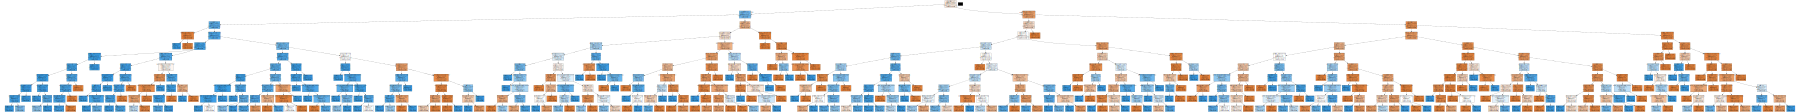

In [65]:
#Decision Tree Map
dot_data2 = tree.export_graphviz(modelDT_custom, out_file=None, 
                     feature_names=X_train_c.columns,  
                     class_names=["No Churn", "Churn"],  # only to classification problems
                     filled=True)  
pydot_graph2 = pydotplus.graph_from_dot_data(dot_data2)
pydot_graph2.set_size('"25,25!"')
gvz_graph2 = graphviz.Source(pydot_graph2.to_string())
gvz_graph2

# 6.4. Neural Networks

In [66]:
# Avg values about the model - interations of 10x to get the average of time and accuracy of train and validation
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def avg_score(model):
    score_train = []
    score_val = []
    timer = []
    
    for i in range(10):
        begin = time.perf_counter() # start counting time
        model.fit(X_train_c, y_train_c) # fit your model to your training data
        end = time.perf_counter() # stop counting time
        
        value_train = model.score(X_train_c, y_train_c) # mean accuracy for train
        value_val = model.score(X_val_c, y_val_c) # mean accuracy for validation
        score_train.append(value_train) # append the mean accuracy in train to your list score_train
        score_val.append(value_val) # append the mean accuracy in validation to your list score_val
        timer.append(end-begin) # append the time to your list timer
    
    avg_time = round(np.mean(timer),3) # check the mean value of training time for your 10 models 
    avg_train = round(np.mean(score_train),3) # check the mean accuracy in train for your 10 models
    avg_val = round(np.mean(score_val),3) # check the mean accuracy in validation for your 10 models
    std_time = round(np.std(timer),2) # check the standard deviation of training time for your 10 models
    std_train = round(np.std(score_train),2) # check the standard deviation of the mean accuracy in train for your 10 models
    std_val = round(np.std(score_val),2) # check the standard deviation of the mean accuracy in validation for your 10 models
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val)

#Getting the resuts of the model
def show_results(df, models):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for model in models:
        # obtain the results provided by avg_score
        time, avg_train, avg_val = avg_score(model)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val
        count+=1
    return df


In [67]:
#Importing Neural Network Model
from sklearn.neural_network import MLPClassifier

#Create a default NN model
model_NN = MLPClassifier()

#Checking time and accuracy (for train and validation)
df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Raw'])
show_results(df, [model_NN])

Time       Train   Validation
Raw  14.146+/-1.5  0.95+/-0.0  0.939+/-0.0

In [68]:
#Optimization to find the optimum values of the parameters
parameter_space = {
    'hidden_layer_sizes': [(15), (15,15)],
    'activation': ['tanh', 'logistic'], #relu
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001, 0.1],
    'learning_rate': ['constant', 'invscaling']
}

#??
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model_NN, parameter_space)

clf.fit(X_train_c, y_train_c)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'logistic'],
                         'hidden_layer_sizes': [15, (15, 15)],
                         'learning_rate': ['constant', 'invscaling'],
                         'learning_rate_init': [0.001, 0.1],
                         'solver': ['sgd', 'adam']})

In [69]:
#Print the best parameters
print(clf.best_params_)
final_model = clf.best_estimator_

#Creating the model with these parameters and getting some results
df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['final_model'])
show_results(df, [final_model])

#Fit the model
final_model.fit(X_train_c, y_train_c)

#Getting the predictions
labels_knn_tr= final_model.predict(X_train_c)
labels_knn_val= final_model.predict(X_val_c)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train_c, labels_knn_tr))
print(confusion_matrix(y_train_c, labels_knn_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val_c, labels_knn_val))
print(confusion_matrix(y_val_c, labels_knn_val))

print('--------------------- RESULTS ---------------------')
print('Train:', final_model.score(X_train_c, y_train_c))
print('Validation:', final_model.score(X_val_c, y_val_c))


{'activation': 'tanh', 'hidden_layer_sizes': (15, 15), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'sgd'}
----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8477
           1       0.96      0.94      0.95      7112

    accuracy                           0.95     15589
   macro avg       0.95      0.95      0.95     15589
weighted avg       0.95      0.95      0.95     15589

[[8179  298]
 [ 456 6656]]
--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2831
           1       0.93      0.94      0.94      2364

    accuracy                           0.94      5195
   macro avg       0.94      0.94      0.94      5195
weighted avg       0.94      0.94      0.94      5195

[[2670  161]
 [ 146 2218]]
--------------------- RESULTS ---------------------
Tra

# 6.5. Random Forest

In [70]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create Gaussian Classifier model and fitting the model
modelclf=RandomForestClassifier(n_estimators=250)
modelclf.fit(X_train_c,y_train_c)

#Information About Decision Tree
print('The defined trees have: ' + str(modelclf.get_params()))

#Getting the predictions
labels_rf_tr = modelclf.predict(X_train_c)
labels_rf_val = modelclf.predict(X_val_c)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train_c, labels_rf_tr))
print(confusion_matrix(y_train_c, labels_rf_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val_c, labels_rf_val))
print(confusion_matrix(y_val_c, labels_rf_val))

print('--------------------- RESULTS ---------------------')
print('Train:', modelclf.score(X_train_c, y_train_c))
print('Validation:', modelclf.score(X_val_c, y_val_c))


The defined trees have: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8477
           1       1.00      1.00      1.00      7112

    accuracy                           1.00     15589
   macro avg       1.00      1.00      1.00     15589
weighted avg       1.00      1.00      1.00     15589

[[8477    0]
 [   0 7112]]
--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.96      0.94    

# 6.6. Gradient Boosting Classifier (GBM)


In [71]:
#import Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Creating the model and fitting the model
model_gb = GradientBoostingClassifier(n_estimators = 300, max_depth=5, max_leaf_nodes=800)
model_gb.fit(X_train_c, y_train_c)

#Getting Predictions
labels_gb_tr = model_gb.predict(X_train_c)
labels_gb_val = model_gb.predict(X_val_c)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train_c, labels_gb_tr))
print(confusion_matrix(y_train_c, labels_gb_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val_c, labels_gb_val))
print(confusion_matrix(y_val_c, labels_gb_val))

print('--------------------- RESULTS ---------------------')
print('Train:', model_gb.score(X_train_c, y_train_c))
print('Validation:', model_gb.score(X_val_c, y_val_c))


----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8477
           1       0.98      0.99      0.98      7112

    accuracy                           0.99     15589
   macro avg       0.99      0.99      0.99     15589
weighted avg       0.99      0.99      0.99     15589

[[8334  143]
 [  77 7035]]
--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2831
           1       0.94      0.96      0.95      2364

    accuracy                           0.95      5195
   macro avg       0.95      0.95      0.95      5195
weighted avg       0.95      0.95      0.95      5195

[[2679  152]
 [  98 2266]]
--------------------- RESULTS ---------------------
Train: 0.9858874847648983
Validation: 0.9518768046198267


# 6.7. Naive Bayes Algorithm

In [72]:
#import Gradient Boosting
from sklearn.naive_bayes import GaussianNB

# Creating the model and fitting the model
model_ba = GaussianNB()
model_ba.fit(X_train_c, y_train_c)

#Getting Predictions
labels_ba_tr = model_ba.predict(X_train_c)
labels_ba_val = model_ba.predict(X_val_c)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(y_train_c, labels_ba_tr))
print(confusion_matrix(y_train_c, labels_ba_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(y_val_c, labels_ba_val))
print(confusion_matrix(y_val_c, labels_ba_val))

print('--------------------- RESULTS ---------------------')
print('Train:', model_ba.score(X_train_c, y_train_c))
print('Validation:', model_ba.score(X_val_c, y_val_c))


----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8477
           1       0.81      0.81      0.81      7112

    accuracy                           0.83     15589
   macro avg       0.82      0.82      0.82     15589
weighted avg       0.83      0.83      0.83     15589

[[7095 1382]
 [1333 5779]]
--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2831
           1       0.79      0.82      0.81      2364

    accuracy                           0.82      5195
   macro avg       0.82      0.82      0.82      5195
weighted avg       0.82      0.82      0.82      5195

[[2325  506]
 [ 429 1935]]
--------------------- RESULTS ---------------------
Train: 0.8258387324395408
Validation: 0.8200192492781521


# 7. Deploy

In [75]:
#Apply the model to GBM to the test dataset
labels_test = model_gb.predict(X_test_c)
labels_test

#Creating the necessary variable for the deliveries
index = test_c.index.T
answers = pd.DataFrame([index, labels_test]).T
answers.columns = ['ID','Answers']
answers

ID  Answers
0     30000        1
1     30001        1
2     30002        0
3     30003        1
4     30004        0
...     ...      ...
5190  35190        1
5191  35191        0
5192  35192        1
5193  35193        1
5194  35194        0

[5195 rows x 2 columns]

In [76]:
#Download the answers
answers.to_csv('answers.csv', index = None)